                            OLS Regression Results                            
Dep. Variable:          Number_Booked   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     393.8
Date:                Sat, 13 Sep 2025   Prob (F-statistic):          2.58e-150
Time:                        13:56:39   Log-Likelihood:                -3410.1
No. Observations:                2631   AIC:                             6826.
Df Residuals:                    2628   BIC:                             6844.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0083      0.017     -0.480      0.6

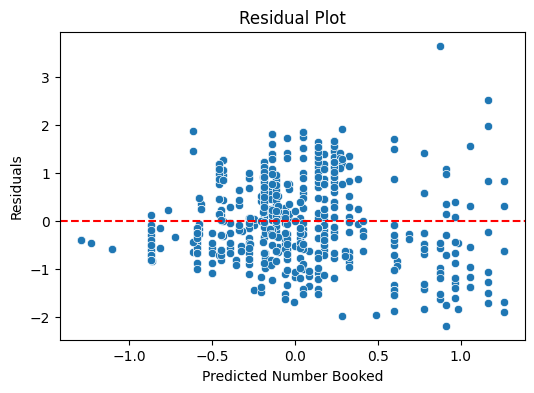

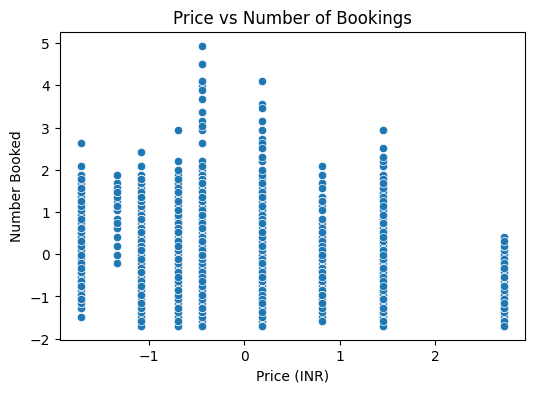

In [4]:
# Import Libraries
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load Data
file_path = '/content/drive/My Drive/CultFit_Project/Cleaned_Classes_April_June_final.csv'
df = pd.read_csv(file_path)

# Step 2: Prepare Data for Modeling
df['Date'] = pd.to_datetime(df['BookingEndDateTime'], errors='coerce')
# Features: Price and Capacity (MaxBookees)
X = df[['Price_INR', 'MaxBookees']]  # Relevant features
y = df['Number_Booked']              # Target variable

# Add constant term for intercept
X = sm.add_constant(X)

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Build the Price Elasticity Model (Linear Regression)
model = sm.OLS(y_train, X_train).fit()

# Print Model Summary (coefficients, R-squared, etc.)
print(model.summary())

# Step 5: Model Predictions & Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# Step 6: Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Number Booked')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Step 7: Price vs Number Booked Scatter Plot
plt.figure(figsize=(6,4))
sns.scatterplot(x='Price_INR', y='Number_Booked', data=df)
plt.xlabel('Price (INR)')
plt.ylabel('Number Booked')
plt.title('Price vs Number of Bookings')
plt.show()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
